In [16]:
# Question 4
import matplotlib.pyplot as plt
import numpy as np
n = 5000
p = 20
Beta = np.zeros(p)
Beta[0] = 1
Beta[1] = -2
Beta = Beta.reshape(p,1)
COV = np.identity(p)
mean = np.zeros(p)

beta_hat = []

X = np.random.multivariate_normal(mean,COV,100)
eps = np.random.normal(0,1,(100))
eps = eps.reshape(100,1)
Y = X.dot(Beta)+eps
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

#print (beta)


PE = 0
for i in range(n):
    eps = np.random.normal(0,1,(100))
    eps = eps.reshape(100,1)
    Y = X.dot(Beta)+eps
    PE += np.sum((Y - X.dot(beta))**2)
print (PE/n)

'''    
pe = []
for i in range(n):
    temp = beta_hat[i]
    PE = np.sum((Y-X.dot(temp))**2)
    pe.append(PE)
pe = np.array(pe)/n

#print (np.mean(pe))
'''


118.33942090556093


'    \npe = []\nfor i in range(n):\n    temp = beta_hat[i]\n    PE = np.sum((Y-X.dot(temp))**2)\n    pe.append(PE)\npe = np.array(pe)/n\n\n#print (np.mean(pe))\n'

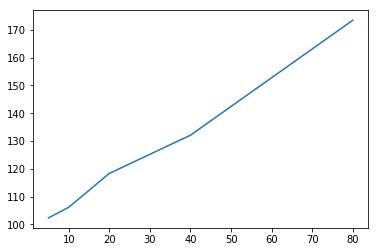

In [17]:
a=[102.32,106.15,118.33,132.09,173.45]
p=[5,10,20,40,80]

a = np.array(a)
p = np.array(p)
a = a.reshape(5,1)
p = p.reshape(5,1)

#k = np.linalg.inv(p.T.dot(p)).dot(p.T).dot(a)
plt.plot(p,a)
plt.show()


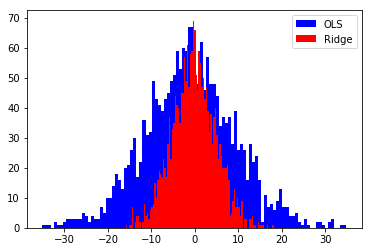

2000
181


In [95]:
# Question 5

Beta = np.array([-1,2])
Beta = Beta.reshape(2,1)
COV = np.array([[1,0.9999],[0.9999,1]])
mean = np.zeros(2)
lamb = 0.005

beta_ols = []
beta_rdg = []

for i in range(2000):
    X = np.random.multivariate_normal(mean,COV,50)
    eps = np.random.normal(0,1,(50))
    eps = eps.reshape(50,1)
    Y = X.dot(Beta)+eps
    Beta_ols = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    beta_ols.append(Beta_ols)
    
    Beta_rdg = np.linalg.inv(X.T.dot(X)+lamb*np.identity(2)).dot(X.T).dot(Y)
    beta_rdg.append(Beta_rdg)
    
beta_ols = np.array(beta_ols)
beta_rdg = np.array(beta_rdg)
beta_ols = beta_ols.reshape(2000,2)
beta_rdg = beta_rdg.reshape(2000,2)
beta_ols_1 = beta_ols[:,0]
beta_rdg_1 = beta_rdg[:,0]
beta_ols_2 = beta_ols[:,1]
beta_rdg_2 = beta_rdg[:,1]

n, bins1, patches = plt.hist(beta_ols_1,100, facecolor='blue', alpha=1, label="OLS")
n, bins2, patches = plt.hist(beta_rdg_1,100, facecolor='red', alpha=1, label='Ridge')
plt.legend()
plt.show()


beta1 = -1
k = 0
for i in range(len(beta_ols)):
    a = abs(beta1-beta_ols_1[i])
    b = abs(beta1-beta_rdg_1[i])
    if a<b:
        k += 1
print (len(beta_ols))
print (k)